In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib import cm
from math import floor,sqrt
import pygmt
%matplotlib inline

In [2]:
import sys
sys.path.append('../')
from topo_stress_tools import *

## Test window function

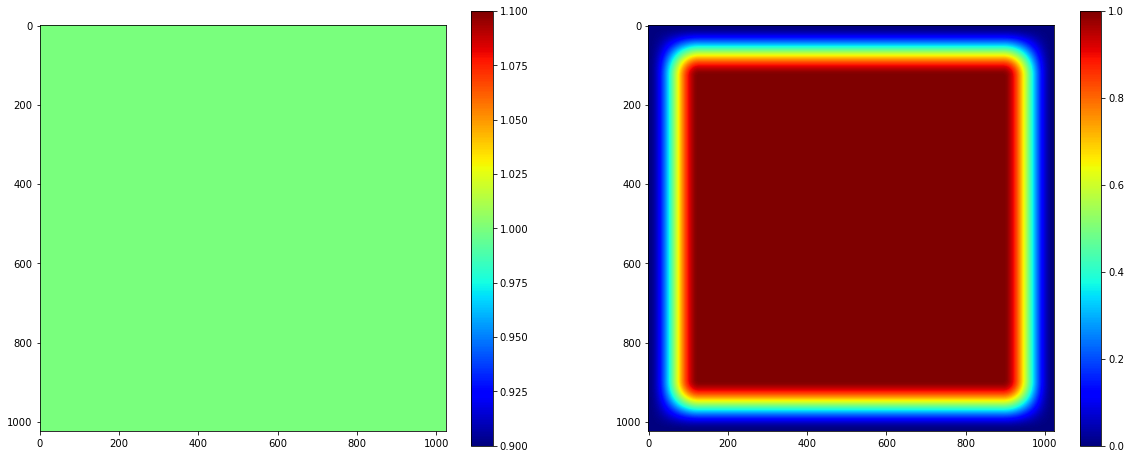

In [7]:
my_grid = np.ones((1024,1024))
my_window = compute_window(my_grid)
fig, ax = plt.subplots(1,2,figsize=(20,8))
csetA = ax[0].imshow(my_grid, cmap=cm.jet)
fig.colorbar(csetA,ax=ax[0])
csetB = ax[1].imshow(my_window, cmap=cm.jet)
fig.colorbar(csetB,ax=ax[1])

plt.show()

## Test the fft function

In [8]:
lon, lat, topo = read_GMT_netcdf('../../toymodel.nc')
topo_k, _, _ = fft_grd(topo)
rTopo, _, _ = fft_grd(topo_k,inv=True)

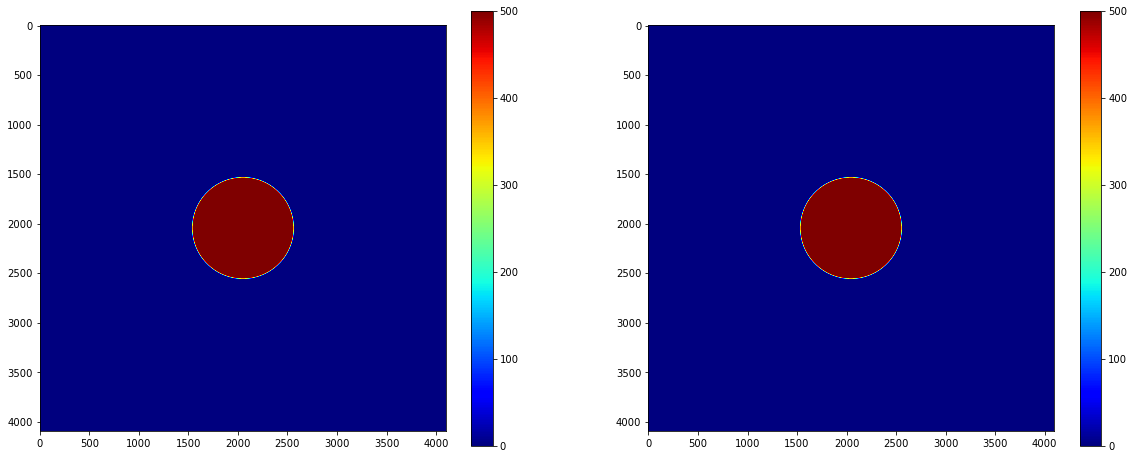

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
csetA = ax[0].imshow(topo, cmap=cm.jet)
fig.colorbar(csetA,ax=ax[0])
csetB = ax[1].imshow(rTopo.real, cmap=cm.jet)
fig.colorbar(csetB,ax=ax[1])

plt.show()

# Test topo_stress


In [3]:
Txx, Tyy, Tzz, Txy, Txz, Tyz = topo_stress('../../toymodel.nc',-0.5)

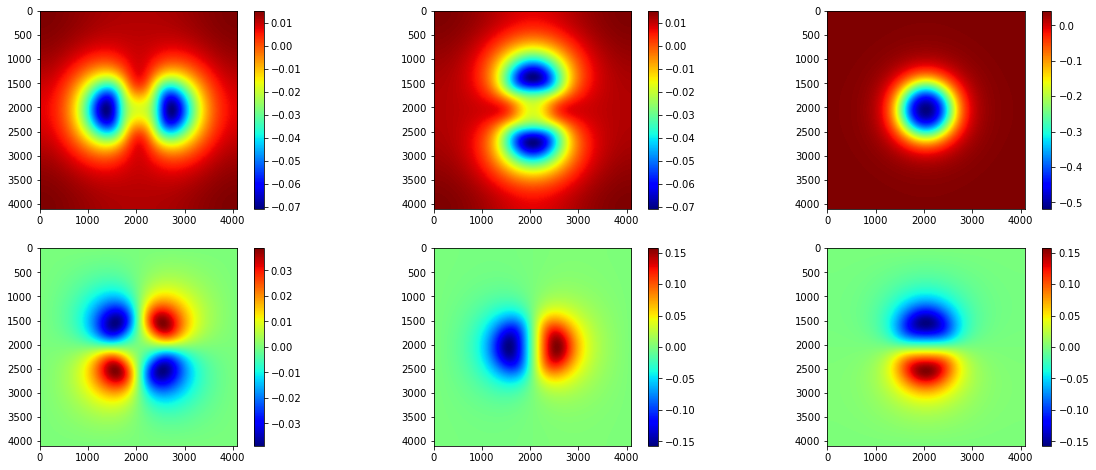

In [4]:
T_all = np.stack([Txx, Tyy, Tzz, Txy, Txz, Tyz],axis=2)
fig, ax = plt.subplots(2,3,figsize=(20,8))
for my_ax,i in zip(ax.flat,range(6)):
    cset = my_ax.imshow(T_all[:,:,i].real, cmap=cm.jet)
    fig.colorbar(cset,ax=my_ax)

### Fortran routine results

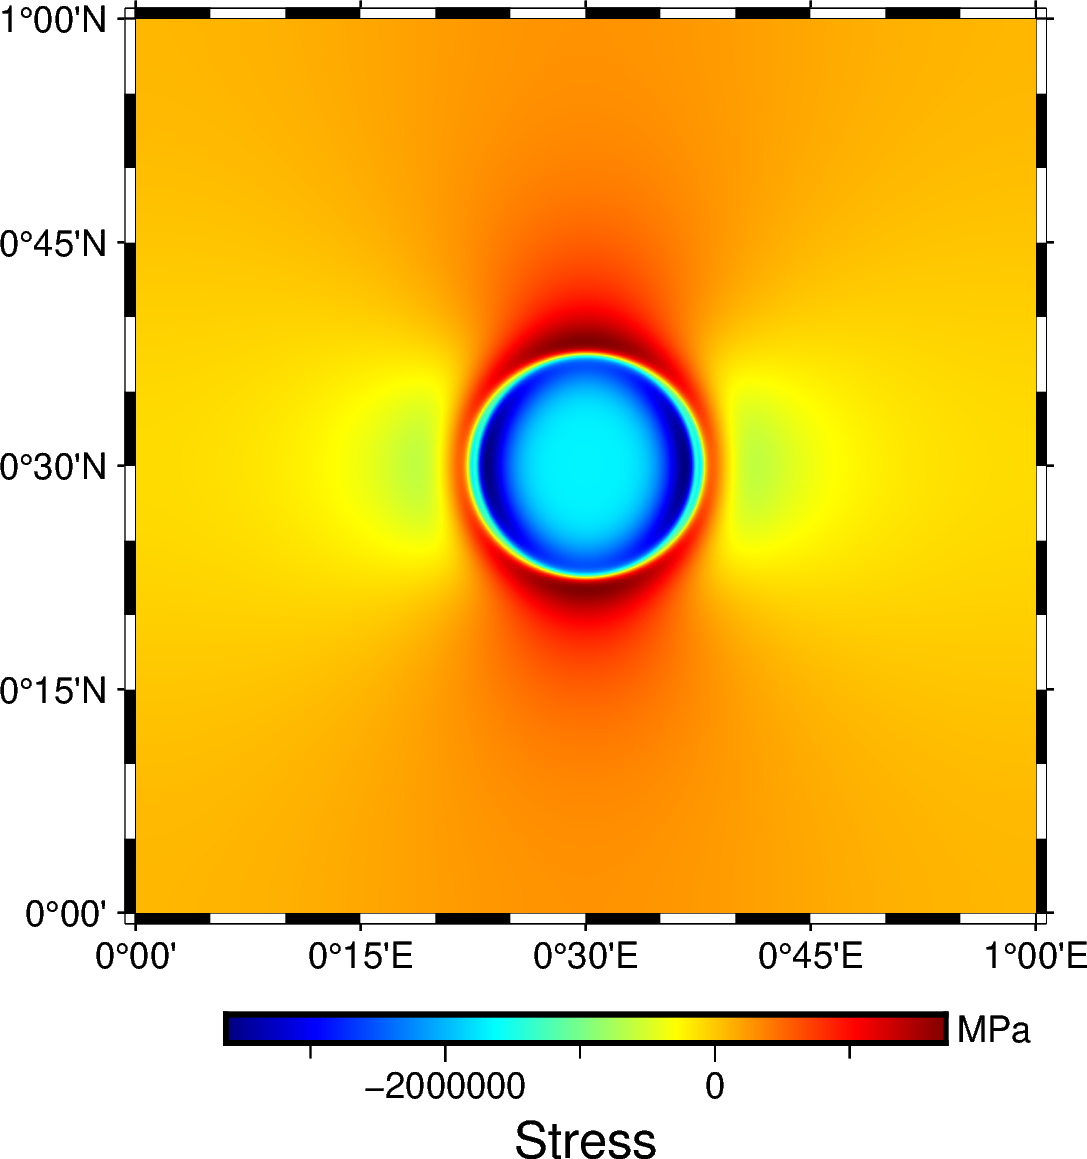

In [4]:
fig = pygmt.Figure()
fig.basemap(region=[0,1,0,1],projection="M3i",frame=True)
fig.grdimage(grid='../../toy_stress_grds/Txx.nc',cmap='jet')
fig.colorbar(
    frame=['x+lStress','y+lMPa']
)
fig.show()